In [6]:
#https://analyticsindiamag.com/step-by-step-guide-to-reviews-classification-using-svc-naive-bayes-random-forest/
#!pip install fastai==2.0.10 torch==1.6 fastcore==1.0.0

In [56]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import matplotlib.image as mplib
import re
from sklearn.decomposition import PCA



(1999, 2500, 3)
(1999, 7500)
(1999, 1000)
0.9991069359456567


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1999, 7500)
(1999, 2500, 3)


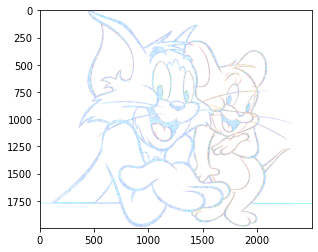

In [57]:
#Reading an image and printing the shape of the image. 
img = mplib.imread('TomNJerry.jpg')
print(img.shape)
plt.imshow(img)

                              #2500*3
img_r = np.reshape(img, (1999, 7500))
print(img_r.shape)

pca = PCA(1000).fit(img_r)
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_))

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (1999,2500 ,3)) 
print(temp.shape) 
plt.imshow(temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(801, 409, 4)
(801, 1636)
(801, 100)
0.9971791
(801, 1636)
(801, 409, 4)


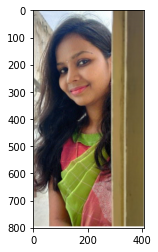

In [64]:
#Reading an image and printing the shape of the image. 
img = mplib.imread('NCR_VsVi.PNG')
print(img.shape)
plt.imshow(img)

                              #409*4
img_r = np.reshape(img, (801, 1636))
print(img_r.shape)

pca = PCA(500).fit(img_r)
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_))

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (801,409 ,4)) 
print(temp.shape) 
plt.imshow(temp)

In [65]:
wine = pd.read_csv("Wine.csv")
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [66]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine)
var = pca.explained_variance_ratio_
pca.components_[0]

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1


array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

In [67]:
z =pca_values[:,2]

In [68]:
z

array([ 3.16461306e+00,  6.81699246e+00, -1.06671672e+00, -9.38312300e-01,
       -4.24917332e-01,  9.22964109e-01,  2.12077648e+00,  7.17177590e-02,
        3.89306597e+00,  1.57388714e+00, -1.87870022e+00,  1.47596597e-01,
        3.72388438e-01,  5.65119701e+00,  2.96916824e+00, -5.26577812e-01,
       -2.43123171e+00, -1.93308983e+00, -1.98899602e+00,  4.15278052e+00,
        4.09947447e+00,  9.80278554e-01,  2.11589075e+00,  8.29750271e-01,
       -2.70213155e-01, -4.10391310e+00,  1.24563024e+00,  1.94781342e-01,
       -8.12987030e-03,  2.20181572e+00, -5.09145642e+00, -3.22547190e+00,
        1.74855550e+00, -1.11452730e+00, -3.75528560e-01, -1.41175042e+00,
        3.77250249e+00,  1.29957566e-01,  3.08175019e+00,  6.67823476e+00,
        3.42055722e+00, -7.40292389e-01,  2.86184426e+00,  2.45638100e+00,
        2.26094321e+00, -7.27254050e-01,  2.02989593e+00,  2.26236049e+00,
       -8.05453267e-01, -9.73400636e-01,  4.21829168e+00, -2.72910049e-01,
        3.21312269e+00, -

In [70]:
new_df = pd.DataFrame(z)
new_df
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)
kmeans.labels_

array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0], dtype=int32)